First few rows of the data:
   visual_score  auditory_score  kinesthetic_score learning_style
0      8.000301        1.389837           9.686887         visual
1      8.401052        7.294055           4.853655         visual
2      9.124874        3.975049           6.688173       auditory
3      5.724100        7.702631           7.535001       auditory
4      5.060739        4.711628           4.302653    kinesthetic

Data Summary:
       visual_score  auditory_score  kinesthetic_score
count    100.000000      100.000000         100.000000
mean       5.570764        4.764262           5.775068
std        2.597370        2.488586           2.725548
min        1.099707        1.008365           1.046257
25%        3.413108        2.621895           3.449149
50%        6.032874        4.249102           6.312109
75%        7.573622        6.824862           8.249078
max        9.946735        9.385282           9.959267

Missing values:
visual_score         0
auditory_score       0
kin

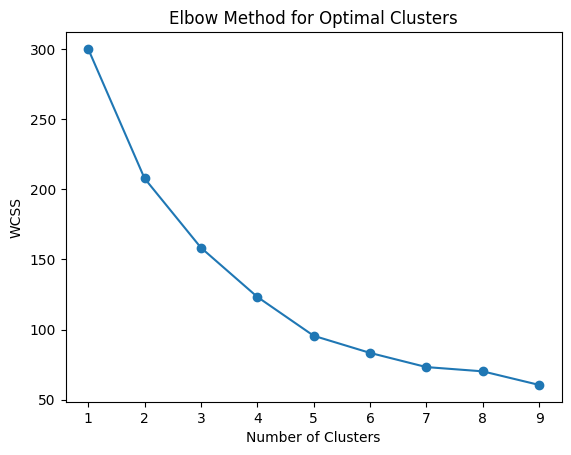

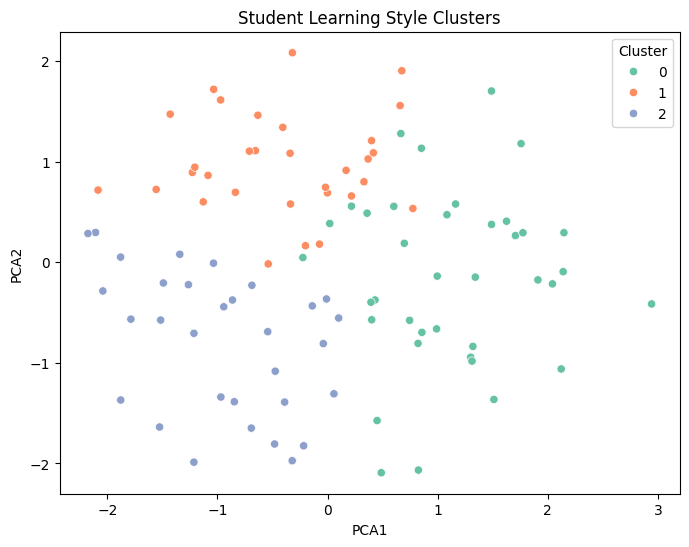

In [2]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Step 2: Load the CSV file
file_path = '/content/student_methods.csv'  # Make sure to upload your file in Colab
df = pd.read_csv(file_path)

# Step 3: Explore the data
print("First few rows of the data:")
print(df.head())
print("\nData Summary:")
print(df.describe())
print("\nMissing values:")
print(df.isnull().sum())

# Step 4: Preprocess the data (Handle missing values if needed)
df = df.dropna()  # or fillna() if you want to fill missing values

# Step 5: Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))

# Step 6: Determine the optimal number of clusters using Elbow Method
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Step 7: Apply KMeans (you can change n_clusters based on elbow plot)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Step 8: Add cluster labels to dataframe
df['Cluster'] = clusters

# Step 9: Use PCA for 2D Visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
df['PCA1'] = reduced_data[:, 0]
df['PCA2'] = reduced_data[:, 1]

# Step 10: Plot Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('Student Learning Style Clusters')
plt.show()

# Step 11: (Optional) Save the clustered data
df.to_csv('/content/clustered_students.csv', index=False)
